# Required Lab -- week of March 19th -- 23rd

Make an animated plot in matplotlib that recreates an analogue clock. 

Make the minute and hour markers in black.  Put numbers (text field) at the hour markers.  Make the hour hand short and fat, the minute hand long and thin, both in black.  Make the second hand in red. 

Set the time on your clock to local time -- use the **time** library. 

Make both a (normal) 12-hour version of your clock, and a 24-hour version. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani
import time
from scipy.integrate import odeint
%matplotlib nbagg


<IPython.core.display.Javascript object>


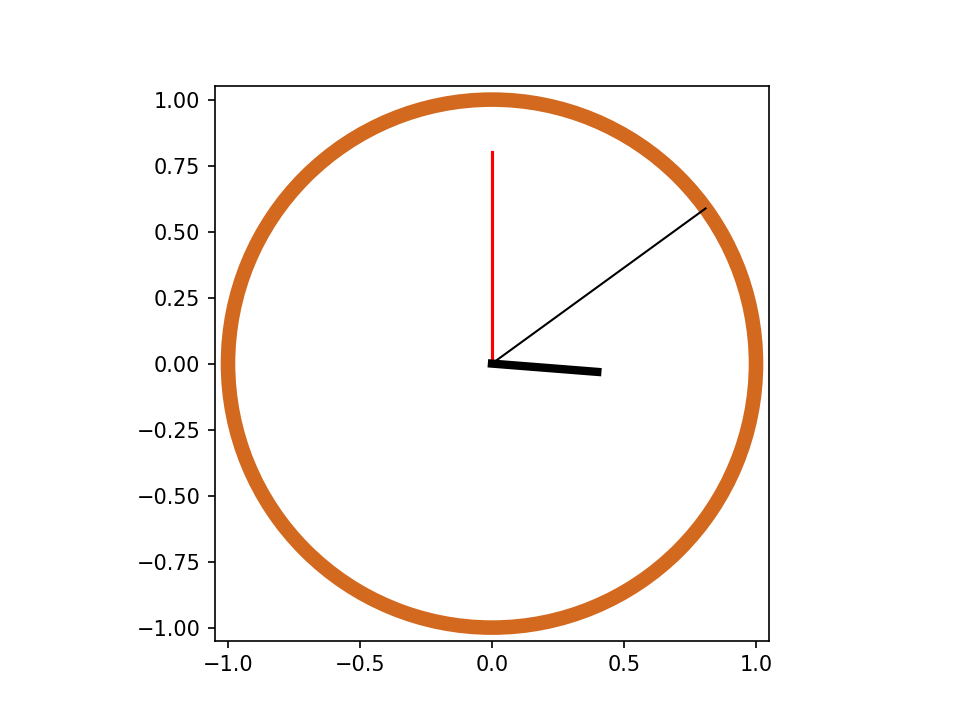

In [3]:
fig, ax = plt.subplots()

circ = plt.Circle((0.0, 0.0), 1.0, color='chocolate', fill=False, linewidth = 7)

ax.add_artist(circ)
ax.set_xlim(-1.05, 1.05)
ax.set_ylim(-1.05, 1.05)
ax.set_aspect("equal")

secondhand, = plt.plot([0.0, 0.0], [0.0, 1], 'r') #gives starting position for the second hand but it wont actually matter - we'll change it to current time
minutehand, = plt.plot([0.0, 0.0], [0.0, 1], 'k')
hourhand, = plt.plot([0.0, 0.0], [0.0, 1], 'k')

hourhand.set_linewidth(4)
minutehand.set_linewidth(1)

#for
#plt.text(0, 0.8, "12")#make the numbers go on

def init():
    secondhand.set_xdata([0.0, 0.0])
    secondhand.set_ydata([0.0, 1])
    minutehand.set_xdata([0.0, 0.0])
    minutehand.set_ydata([0.0, 1])
    hourhand.set_xdata([0.0, 0.0])
    hourhand.set_ydata([0.0, 1])
    return [secondhand, minutehand, hourhand] 

def animate(i):
    
    now = time.localtime()
    
    hour = now[3]
    minute = now[4]
    second = now[5]
    thetah = np.pi/2 - 2*np.pi/12 *(minute/60 + second/3600 + hour-7)
    thetam = np.pi/2 - 2*np.pi/60 *(second/60 + minute)
    thetas = np.pi/2 - 2*np.pi/60 *second
    
    secondhand.set_xdata([0.0, 0.8*np.cos(thetas)])
    secondhand.set_ydata([0.0, 0.8*np.sin(thetas)])
    minutehand.set_xdata([0.0, np.cos(thetam)])
    minutehand.set_ydata([0.0, np.sin(thetam)])
    hourhand.set_xdata([0.0, 0.4*np.cos(thetah)])
    hourhand.set_ydata([0.0, 0.4*np.sin(thetah)])
    return [secondhand, minutehand, hourhand]
    
## interval is ms delay between frames
anim = ani.FuncAnimation(fig, animate, init_func=init, interval=20, blit=True) #always use blit => also always have to init

plt.show()